In [411]:
#step 1: import the libirary
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import log


In [412]:
# Step 2: Import file
data = pd.read_excel('aggregated_dataset(in).xlsx')
data["Formatted_Date"] = pd.to_datetime(data["month_year"]).dt.strftime("%d-%m")

# Aggregate Sales by Date and city
--Understand the sales trend based on each city during 2 years

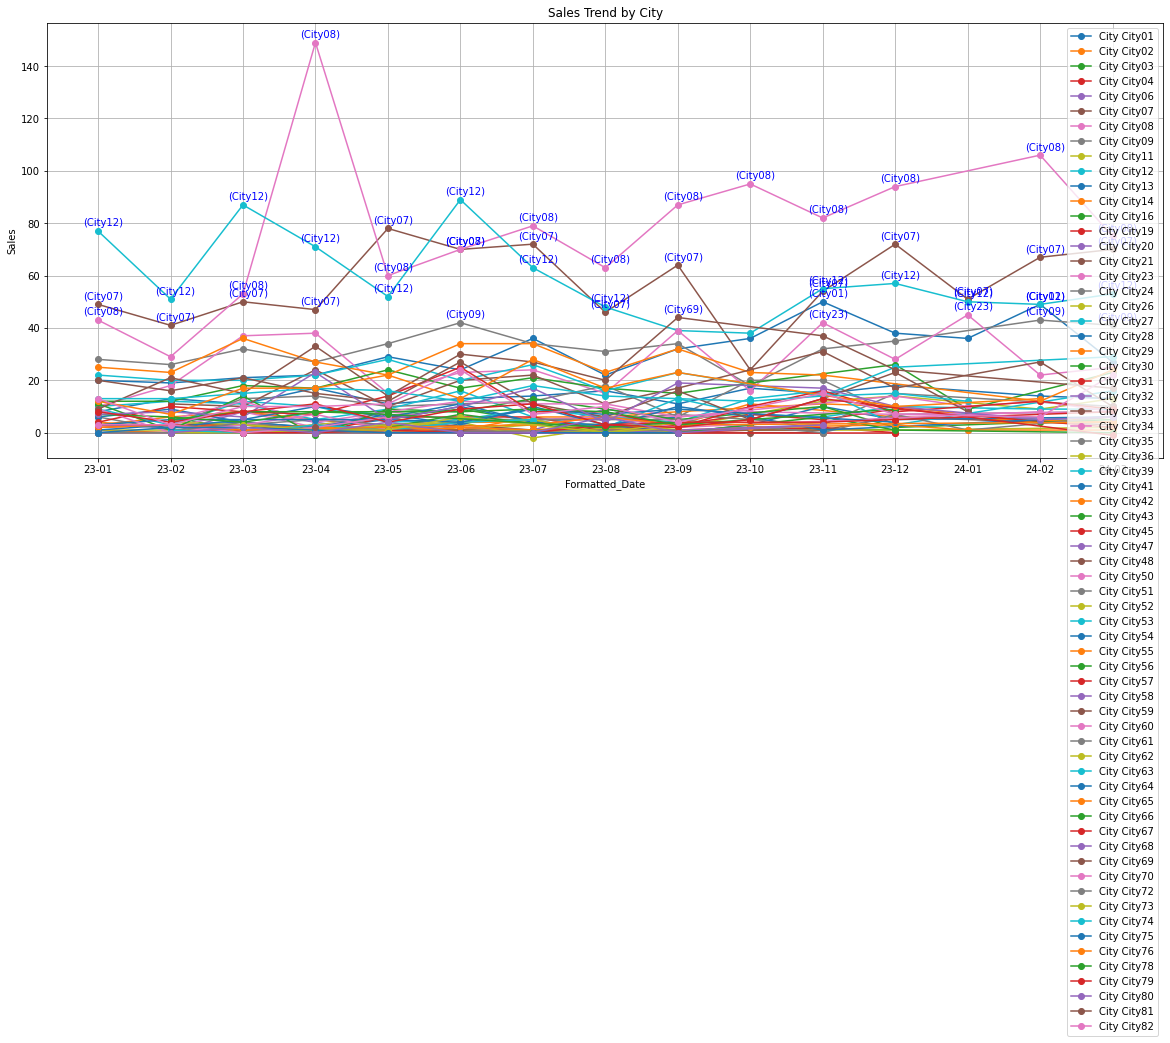

In [413]:
# step 3 : plot to identify which city contribute most of sales （group by each city and sum sales based on each month)
            ##to check if there is time series trend and which city sales trend is largely impact

for city in data["city_code"].unique():
    city_data = data[data["city_code"] == city] 
    plt.plot(city_data["Formatted_Date"], city_data["agg_prescriptions"], marker='o', label=f"City {city}")
    #filter_df=city_data[city_data["agg_prescriptions"]>40]
    for i in city_data[city_data["agg_prescriptions"]>40]["Formatted_Date"]:
        filter_df=city_data[city_data["Formatted_Date"]==i] 
        x=filter_df["Formatted_Date"]
        y=filter_df["agg_prescriptions"]
        plt.annotate(
            f"({city})",
            (filter_df["Formatted_Date"], filter_df["agg_prescriptions"]),
            textcoords="offset points",
            xytext=(5, 5),
            ha='center',
            fontsize=10,
            color='blue'
        )
    
plt.rcParams["figure.figsize"] = [20, 8]  # Width: 12, Height: 8
 
plt.xlabel("Formatted_Date")
plt.ylabel("Sales")
plt.title("Sales Trend by City")
plt.legend()
plt.grid()
plt.show()

 

City 08, City 07, and City 12 contribute the majority of sales over the observed time range. Additionally, we can observe seasonality effects in the graph, indicating fluctuations in sales at specific times of the year.

# City vs Channels

City-Level Dominant Channels:


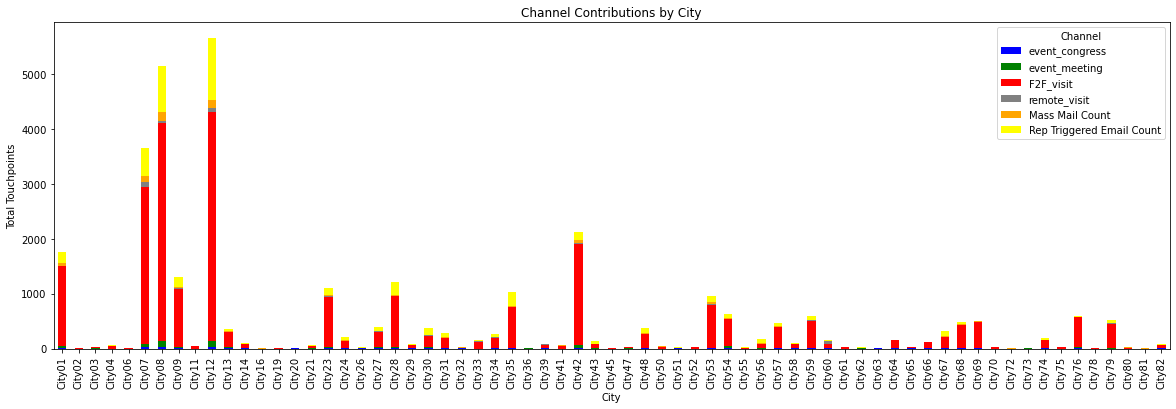

In [414]:
city_trends = data.groupby("city_code")[['event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].sum()
city_trends

# Add a column for the dominant channel in each city
city_trends['Dominant_Channel'] = city_trends.idxmax(axis=1)

print("City-Level Dominant Channels:")
city_trends

import matplotlib.pyplot as plt

# Plot stacked bar chart
city_trends[['event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].plot(
    kind='bar', stacked=True, figsize=(20, 6), color=['blue', 'green', 'red','gray','orange','yellow']
)

plt.title("Channel Contributions by City")
plt.xlabel("City")
plt.ylabel("Total Touchpoints")
plt.legend(title="Channel")
plt.show()

1.F2F is the top choice for every cities<br />
2.EM is also common method to reach out customers

# Aggregate Sales by Date and Channel
--Explore Which channel drives the highest sales?<br />
--understand the trend of each channels for each month

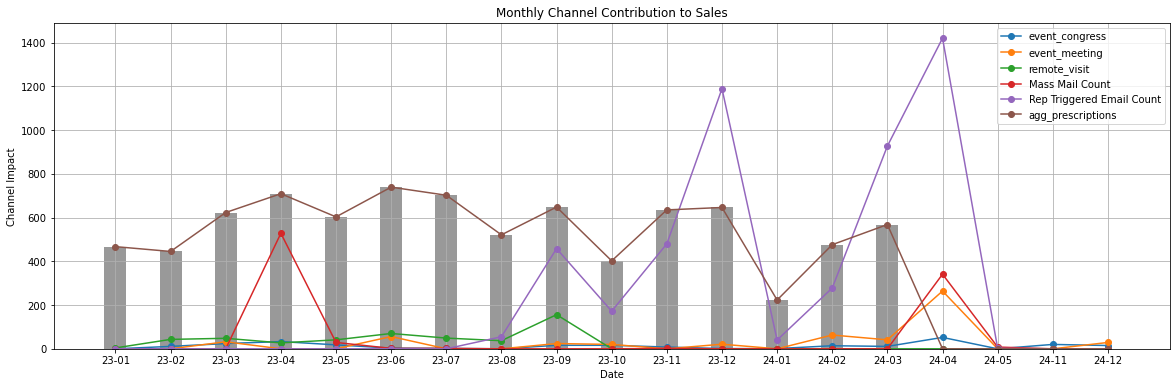

In [415]:
# Aggregate data by Date and Channel
channel_trends = data.groupby('Formatted_Date')[['agg_prescriptions','event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].sum()

# Plot the trends
plt.figure(figsize=(20, 6))
plt.plot(channel_trends.index, channel_trends['event_congress'], label='event_congress', marker='o')
plt.plot(channel_trends.index, channel_trends['event_meeting'], label='event_meeting', marker='o')
#plt.plot(channel_trends.index, channel_trends['F2F_visit'], label='F2F_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['remote_visit'], label='remote_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['Mass Mail Count'], label='Mass Mail Count', marker='o')
plt.plot(channel_trends.index, channel_trends['Rep Triggered Email Count'], label='Rep Triggered Email Count', marker='o')
plt.plot(channel_trends.index, channel_trends['agg_prescriptions'], label='agg_prescriptions', marker='o')
plt.bar(channel_trends.index,  channel_trends['agg_prescriptions'], color ='0.6',  width = 0.4)


plt.title('Monthly Channel Contribution to Sales')
plt.xlabel('Date')
plt.ylabel('Channel Impact')
plt.legend()
plt.grid()
plt.show()





1.There is seasonality factor in the group, sales increases in the summer time.<br />
2.We know the F2F visit channel is most popular way to reach customers, but it would impact a lot for sales(did not show on the graph)<br />
3.Rep triggerd EM is becomming more poplular in the late of 2023 , maybe due to digital transformation, but did not see any contribute to sales<br />
4.Mass Mail Count increase after sales went up




## This shows how each channel contributes to sales over time based on cities
--Does the impact vary by city or season?

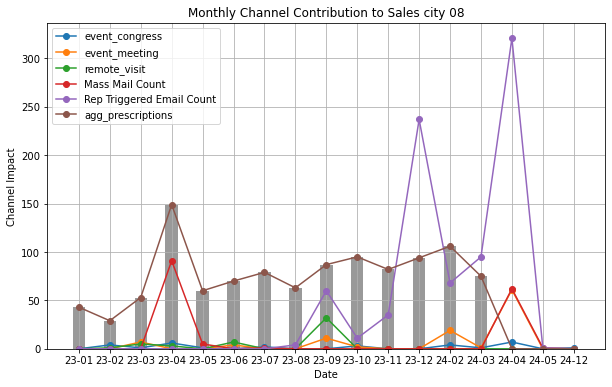

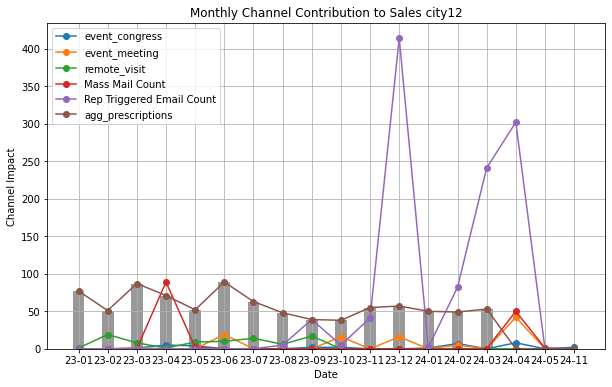

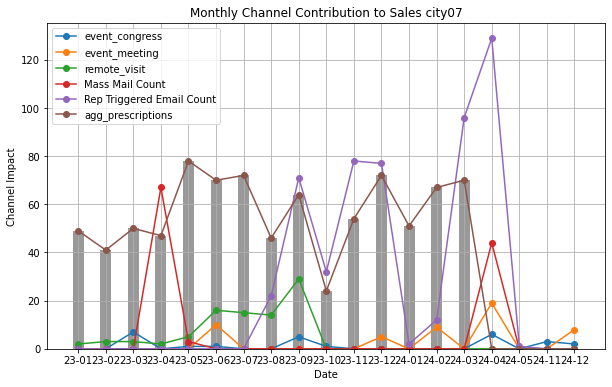

In [416]:
# check few examples : 
df_city08=data[data["city_code"]=='City08']
channel_trends = df_city08.groupby('Formatted_Date')[['agg_prescriptions','event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].sum()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(channel_trends.index, channel_trends['event_congress'], label='event_congress', marker='o')
plt.plot(channel_trends.index, channel_trends['event_meeting'], label='event_meeting', marker='o')
#plt.plot(channel_trends.index, channel_trends['F2F_visit'], label='F2F_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['remote_visit'], label='remote_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['Mass Mail Count'], label='Mass Mail Count', marker='o')
plt.plot(channel_trends.index, channel_trends['Rep Triggered Email Count'], label='Rep Triggered Email Count', marker='o')
plt.plot(channel_trends.index, channel_trends['agg_prescriptions'], label='agg_prescriptions', marker='o')
plt.bar(channel_trends.index,  channel_trends['agg_prescriptions'], color ='0.6',  width = 0.4)


plt.title('Monthly Channel Contribution to Sales city 08')
plt.xlabel('Date')
plt.ylabel('Channel Impact')
plt.legend()
plt.grid()
plt.show()




# Plot the trends
df_city12=data[data["city_code"]=='City12']
channel_trends = df_city12.groupby('Formatted_Date')[['agg_prescriptions','event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].sum()

plt.figure(figsize=(10, 6))
plt.plot(channel_trends.index, channel_trends['event_congress'], label='event_congress', marker='o')
plt.plot(channel_trends.index, channel_trends['event_meeting'], label='event_meeting', marker='o')
#plt.plot(channel_trends.index, channel_trends['F2F_visit'], label='F2F_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['remote_visit'], label='remote_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['Mass Mail Count'], label='Mass Mail Count', marker='o')
plt.plot(channel_trends.index, channel_trends['Rep Triggered Email Count'], label='Rep Triggered Email Count', marker='o')
plt.plot(channel_trends.index, channel_trends['agg_prescriptions'], label='agg_prescriptions', marker='o')
plt.bar(channel_trends.index,  channel_trends['agg_prescriptions'], color ='0.6',  width = 0.4)


plt.title('Monthly Channel Contribution to Sales city12')
plt.xlabel('Date')
plt.ylabel('Channel Impact')
plt.legend()
plt.grid()
plt.show()

# Plot the trends
df_city07=data[data["city_code"]=='City07']
channel_trends = df_city07.groupby('Formatted_Date')[['agg_prescriptions','event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].sum()

plt.figure(figsize=(10, 6))
plt.plot(channel_trends.index, channel_trends['event_congress'], label='event_congress', marker='o')
plt.plot(channel_trends.index, channel_trends['event_meeting'], label='event_meeting', marker='o')
#plt.plot(channel_trends.index, channel_trends['F2F_visit'], label='F2F_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['remote_visit'], label='remote_visit', marker='o')
plt.plot(channel_trends.index, channel_trends['Mass Mail Count'], label='Mass Mail Count', marker='o')
plt.plot(channel_trends.index, channel_trends['Rep Triggered Email Count'], label='Rep Triggered Email Count', marker='o')
plt.plot(channel_trends.index, channel_trends['agg_prescriptions'], label='agg_prescriptions', marker='o')
plt.bar(channel_trends.index,  channel_trends['agg_prescriptions'], color ='0.6',  width = 0.4)


plt.title('Monthly Channel Contribution to Sales city07')
plt.xlabel('Date')
plt.ylabel('Channel Impact')
plt.legend()
plt.grid()
plt.show()

# How strongly are channels correlated with sales?
--ignore cities and month-year

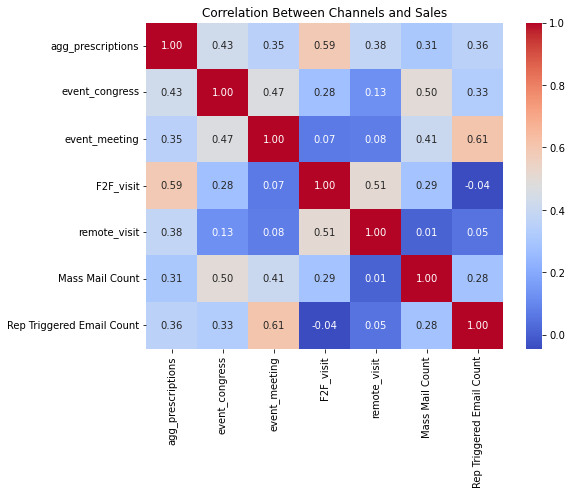

,agg_prescriptions,event_congress,event_meeting,F2F_visit,remote_visit,Mass Mail Count,Rep Triggered Email Count
agg_prescriptions,1.000000,0.427279,0.353501,0.588612,0.381826,0.307073,0.358818
event_congress,0.427279,1.000000,0.468114,0.276636,0.125421,0.497217,0.327137
event_meeting,0.353501,0.468114,1.000000,0.069254,0.075383,0.406990,0.607862
F2F_visit,0.588612,0.276636,0.069254,1.000000,0.508570,0.286738,-0.044788
remote_visit,0.381826,0.125421,0.075383,0.508570,1.000000,0.009720,0.050993
Mass Mail Count,0.307073,0.497217,0.406990,0.286738,0.009720,1.000000,0.283933
Rep Triggered Email Count,0.358818,0.327137,0.607862,-0.044788,0.050993,0.283933,1.000000


In [417]:
import seaborn as sns
 
# Correlation matrix
correlation = data[['agg_prescriptions', 'event_congress', 'event_meeting', 'F2F_visit','remote_visit','Mass Mail Count','Rep Triggered Email Count']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Between Channels and Sales')
plt.show()
correlation

1 F2F and event_congress has the highest correlation with sales (0.59,0.43), suggesting it is likely the most impactful channel. <br />
2 F2F and event_congress related to each other.--0.51 <br />
2 EVENT meeting have strong correlation with Email, maybe becuase the email will be sent for reminder or invitation

# Fit into model to predict 
- split cities code into two group
- add Month and Year variable instead of year-month
- add agg_prescriptions_lagged
- build interaction effect 

In [418]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
data_model=data

# Sort cities alphabetically and split into two groups
data_model['City_Group'] = ['Group1' if i < 41 else 'Group2' for i in range(len(data_model))]

# One-hot encode 'City'
data_encoded = pd.get_dummies(data_model, columns=['City_Group'], drop_first=True)

# Convert to datetime format
data_encoded['Year'] = data_encoded['Formatted_Date'].str[:2]  # First 4 characters are the year
data_encoded['Month'] = data_encoded['Formatted_Date'].str[3:]  # Characters after the hyphen are the month
 
data_encoded['Month']= data_encoded['Month'].fillna(0).astype(int)
data_encoded['Year']= data_encoded['Year'].fillna(0).astype(int)

# Lagging the target variable (for time series modeling)
data_encoded['agg_prescriptions_lagged'] = data_encoded['agg_prescriptions'].shift(1)  # Lagged version of Y by 1 day

 
# Drop rows with NaN values after lagging (to avoid issues with missing values)
data_encoded.dropna(inplace=True)
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
data_encoded.fillna(0, inplace=True)

# # Define the independent variables (including the time-related features)
X = data_encoded[data_encoded.columns.difference(['agg_prescriptions','month_year','Formatted_Date',"city_code"])]
Y = data_encoded['agg_prescriptions']  # Dependent variable
 

In [421]:
X

,City_Group_Group2,F2F_visit,Mass Mail Count,Month,Rep Triggered Email Count,Year,agg_prescriptions_lagged,event_congress,event_meeting,remote_visit,...,agg_prescriptions_laggedxevent_congress,agg_prescriptions_laggedxevent_meeting,agg_prescriptions_laggedxremote_visit,agg_prescriptions_laggedxunit_price,event_congressxevent_meeting,event_congressxremote_visit,event_congressxunit_price,event_meetingxremote_visit,event_meetingxunit_price,remote_visitxunit_price
1,0,156,0,2,0,23,20.0,0,0,0,...,0.0,0.0,0.0,136300.0,0,0,0.0,0,0.0,0.0
2,0,255,0,3,0,23,19.0,0,5,3,...,0.0,95.0,57.0,129485.0,0,0,0.0,15,34075.0,20445.0
3,0,158,33,4,0,23,21.0,2,0,0,...,42.0,0.0,0.0,143115.0,0,0,13630.0,0,0.0,0.0
4,0,328,4,5,0,23,22.0,3,0,2,...,66.0,0.0,44.0,149930.0,0,6,20445.0,0,0.0,13630.0
5,0,210,0,6,0,23,29.0,0,0,0,...,0.0,0.0,0.0,197635.0,0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1,4,0,9,2,23,10.0,0,0,2,...,0.0,0.0,20.0,88930.0,0,0,0.0,0,0.0,17786.0
774,1,0,0,11,2,23,4.0,0,0,0,...,0.0,0.0,0.0,35572.0,0,0,0.0,0,0.0,0.0
775,1,0,0,12,2,23,15.0,0,0,0,...,0.0,0.0,0.0,133395.0,0,0,0.0,0,0.0,0.0
776,1,0,0,2,0,24,7.0,0,1,0,...,0.0,7.0,0.0,77812.0,0,0,0.0,0,11116.0,0.0


In [420]:
# Interaction Terms
import itertools

# Generate all pairwise combinations of independent variables
combinations = list(itertools.combinations(X.columns, 2))

# Create interaction terms
for var1, var2 in combinations:
    interaction_term = f"{var1}x{var2}"  # Column name for interaction
    X[interaction_term] = X[var1]*X[var2]
    
    
# # Get feature names
# feature_names = poly.get_feature_names_out(X.columns)

# # Create a new DataFrame with interactions
# df_interactions = pd.DataFrame(X_interactions, columns=feature_names)
 

C:\Users\yu301\AppData\Local\Temp\ipykernel_16976\1677557100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[interaction_term] = X[var1]*X[var2]


In [422]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


In [423]:
# Train the model

OLS_model = sm.OLS(y_train, X_train_const).fit()
print(OLS_model.summary())

y_pred = OLS_model.predict(X_test_const)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R-squared: {r2}')

# Calculate Mean Absolute Percentage Deviation (MAPD)
mapd = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Test MAPD: {mapd}%')

# Calculate AIC and BIC
aic = OLS_model.aic
bic = OLS_model.bic
print(f'AIC: {aic}')
print(f'BIC: {bic}')

# Interpretation of coefficients
coefficients = OLS_model.params
print('Coefficients:')
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:      agg_prescriptions   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     43.07
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.04e-152
Time:                        15:38:44   Log-Likelihood:                -1636.7
No. Observations:                 509   AIC:                             3399.
Df Residuals:                     446   BIC:                             3666.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

 - R^2 is 0.857 which means 
 -F2F_visitxRep Triggered Email Count   
F2F_visitxremote_visit  
Monthxremote_visit
Rep Triggered Email Countxremote_visit
agg_prescriptions_laggedxremote_visit
remote_visitxunit_price

Positive interaction coefficients indicate that the channel has a larger effect in Group 2 than in Group 1.
Negative interaction coefficients suggest the opposite.

In [406]:
# from sklearn.metrics import mean_squared_error
# # Make predictions
# y_pred = gamma_results.predict(X_test_const)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Test MSE: {mse}')
# print(f'Test R-squared: {r2}')

# # Calculate Mean Absolute Percentage Deviation (MAPD)
# mapd = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# print(f'Test MAPD: {mapd}%')

# # Calculate AIC and BIC
# aic = gamma_results.aic
# bic = gamma_results.bic
# print(f'AIC: {aic}')
# print(f'BIC: {bic}')

# # Interpretation of coefficients
# coefficients = gamma_results.params
# print('Coefficients:')
# print(coefficients)

In [424]:
elasticities = {}
for var in X_train.columns:
    elasticity = coefficients[var] * X_train[var].mean() / y_train.mean()
    elasticities[var] = elasticity
print('Elasticities:')
print(elasticities)

Elasticities:
{'City_Group_Group2': -0.9433811060525662, 'F2F_visit': 0.00040419269033487205, 'Mass Mail Count': -0.0012858942645263495, 'Month': -7.119697270953243, 'Rep Triggered Email Count': -1.6377953806175027, 'Year': -109.1834992839403, 'agg_prescriptions_lagged': 8.113264218733166, 'event_congress': -4.063526288200314, 'event_meeting': -2.1838875352835503, 'remote_visit': 0.0006314918649497005, 'unit_price': -95.0910238241873, 'City_Group_Group2xF2F_visit': 0.09557747721712101, 'City_Group_Group2xMass Mail Count': 0.05125902255092431, 'City_Group_Group2xMonth': -0.09146388730289792, 'City_Group_Group2xRep Triggered Email Count': -0.05095569295557025, 'City_Group_Group2xYear': 1.1901473482906948, 'City_Group_Group2xagg_prescriptions_lagged': -0.12744276001628196, 'City_Group_Group2xevent_congress': -0.06579634063648607, 'City_Group_Group2xevent_meeting': -0.056809768371173325, 'City_Group_Group2xremote_visit': 0.11067188901246468, 'City_Group_Group2xunit_price': -0.1760424556127

In [ ]:
Are certain channels more effective in specific cities?